# Développement logiciel
#     Travaux Patriques Python  
###                                                               Mathilde Cadon & Arielle Gantelet


Avant toutes choses, nous devons importer le fichier $utils.py$ qui contient toutes nos fonctions ainsi que les bibliothèques utiles à leurs appels.

In [30]:
run ./utils.py

## Implémentation sans numpy


### Question 4 :
Appliquons la fonction calcul_nb_voisins à la liste (de liste) Z, et expliquons ce que l'on obtient à la sortie.
Rappelons que cette fonction, et toutes les fonctions définies dans la
suite seront placées dans un fichier $utils.py$.

In [31]:
Z = [[0,0,0,0,0,0],
[0,0,0,1,0,0],
[0,1,0,1,0,0],
[0,0,1,1,0,0],
[0,0,0,0,0,0],
[0,0,0,0,0,0]]

Z

[[0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

Cette matrice représente une "carte" de cellule qui comporte des cellules mortes (codées par un 0) sur ses frontières,
puis des cellules vivantes (codées par un 1) ou morte à l'intérieur.

In [32]:
calcul_nb_voisins(Z)

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

La fonction "calcul_nb_voisins" permet de prendre en argument un état du jeu de la vie. 
Cette fonction calcule ensuite, pour chaque cellule n'étant pas aux frontières, le nombre de cellules vivantes qui sont dans son entourage (les 8 cases autour d'elle). 
Elle renvoie donc une liste de liste contenant, non plus des 0 ou des 1 pour dire que la cellule est morte ou vivante, mais le nombre de cellules qui sont présentes autour d'elle. Cette "carte" conservera donc sa frontière de 0 car les calculs se font sur les cellules n'étant pas sur la frontière.


Passons maintenant à la fonction "itération_jeu".

In [33]:
help(iteration_jeu)

Help on function iteration_jeu in module __main__:

iteration_jeu(Z)
    Fonction qui prend en argument l'état initial du jeu de la vie (sous forme de liste de liste).
    Fonction qui retourne l'état du jeu après 1 itération.
    
    La fonction fait appel à la fonction qui calcule le nombre de voisins puis modifie
    les cellules, qui sont représentées par des 0 ou des 1 dans la matrice Z,
    en appliquant la règle de décision expliquée dans l'énoncée.
    
    - Si la cellule est vivante et qu'elle a moins de 2 voisins ou plus de 3 voisins, alors elle meurt.
    - Si la cellule est morte et qu'elle à 3 voisins alors elle vit.
    Dans tous les autres cas, la cellule reste dans le même état.



### Question 5 :
Dans cette question on affichera les étapes du jeu de 0
à 9 itérations pour la liste Z en utilisant une boucle for. On utilisera la fonction subplot de matplotlib pour
afficher sur 2 lignes et 5 colonnes ces 10 matrices. On transformera ces listes en array
pour pouvoir utiliser la fonction imshow de matplotlib.


On importe les bibliothèques necessaires.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math

Nous réalisons maintenant la boucle pour afficher ces 10 états du jeu de la vie.

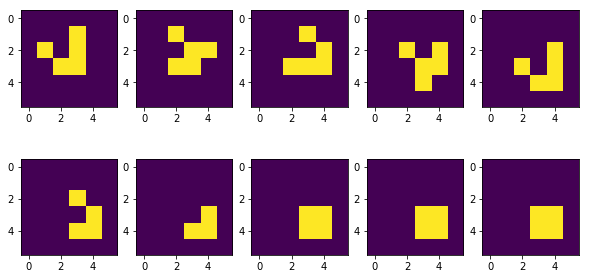

In [35]:
plt.figure(figsize=(10,5))
Zbis = np.copy(Z)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(np.array(Zbis))
    Zbis = iteration_jeu(Zbis)

### Question 6 : 

Tout d'abord, remarquons que l'image à l'itération 0 est la même que l'image à l'itération 4 à une translation près. Constatons également que l'image à l'itération 2 est identique, à une symétrie axiale près, à l'image de l'itération 0.
De plus, l'image à l'itération 1, après une symétrie axiale et une rotation, correspond à l'image de l'itération 3. Ainsi, on observe que les cellules évoluent et permettent de créer de nouveaux états, cependant, comme dit précédemment, on retrouve certaines similitudes entre eux. On constatera également que, pour chaque état de 0 à 4, nous avons toujours 5 cellules vivantes.

A partir de l'itération 7, le jeu est stable et ne bougera donc plus, en effet, chaque cellule possède 3 voisins.

##  Implémentation avec Numba

### Question 7 :
Reprenons la section précédente avec les fonctions utilisant numba et la compilation @jit.

Importons, tout d'abord, la bibliothèque permettant d'utiliser les commandes dédiées aux calculs de temps.

In [36]:
import time

Réalisons maintenant le protocole pour voir les différences de temps de calculs.

In [37]:
# Avec compilation
start = time.time()
calcul_nb_voisins_fast(np.array(Z))
end = time.time()
print("Temps de calcul (avec compilation) = %s" % (end - start))

# Sans compilation
start = time.time()
calcul_nb_voisins_fast(np.array(Z))
end = time.time()
print("Temps de calcul (sans compilation) = %s" % (end - start))

# Fonction sans jit
start = time.time()
calcul_nb_voisins(Z)
end = time.time()
print("Temps de calcul (fonction de base) = %s" % (end - start))

Temps de calcul (avec compilation) = 0.517676830291748
Temps de calcul (sans compilation) = 0.0
Temps de calcul (fonction de base) = 0.0


In [38]:
# Avec compilation
start = time.time()
iteration_jeu_fast(np.array(Z))
end = time.time()
print("Temps de calcul (avec compilation) = %s" % (end - start))

# sans compilation
start = time.time()
iteration_jeu_fast(np.array(Z))
end = time.time()
print("Temps de calcul (sans compilation) = %s" % (end - start))

#Fonction sans jit
start = time.time()
iteration_jeu(np.array(Z))
end = time.time()
print("Temps de calcul (fonction de base) = %s" % (end - start))

Temps de calcul (avec compilation) = 0.42685580253601074
Temps de calcul (sans compilation) = 0.0
Temps de calcul (fonction de base) = 0.0


Cette méthode sera peu précise, étant donné que les temps retournés dépendent beaucoup de paramètres extérieurs. En effet, nous ne faisons qu'un seul test et ne faisons donc pas une moyenne.

In [39]:
%timeit calcul_nb_voisins_fast(np.array(Z))
%timeit calcul_nb_voisins(Z)

%timeit iteration_jeu_fast(np.array(Z))
%timeit iteration_jeu(Z)

14 µs ± 1.33 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
27.6 µs ± 1.45 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
13.9 µs ± 624 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
40.5 µs ± 3.07 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Cette méthode permet, quant à elle, de lancer plusieurs fois les fonctions et de donner une moyenne. Elle est donc plus précise que la précédente.

On remarque que les méthodes utilisant la compilation @jit sont plus rapides que les méthodes normales. Ici, ces méthodes sont, environ, 2 fois plus rapides pour calcul_nb_voisins et 2.5 fois plus rapides pour itérations_jeu.

### Question 8 : 
Créons un widget dont le curseur permet de contrôler les itérations (par exemple de 0 à 30)
du jeu de la vie.

Tout d'abord, définissons la matrice Z_huge.

In [40]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
[[0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0],
[0, 1, 0, 1, 0, 0],
[0, 0, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np

Importons, maintenant, la bibliothèque permettant de créer des widgets.

Pour sa création nous avons du créer une fonction nommée "itération" et qui prend en argument un np.array ainsi qu'un nombre d'itération. Elle permet d'afficher l'évolution de notre "carte" avec un nombre d'itération choisi.

In [41]:
from ipywidgets import interact, fixed

interact(iteration, Z=fixed(Z_huge), nb_iter=(1, 30, 1));

interactive(children=(IntSlider(value=15, description='nb_iter', max=30, min=1), Output()), _dom_classes=('wid…

## Exercice 2

In [42]:
from sklearn.datasets import fetch_mldata
from random import randint

In [43]:
mnist = fetch_mldata('MNIST original')
X = mnist.data.astype('float64')
y = mnist.target


C:\Users\Mathilde\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Mathilde\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


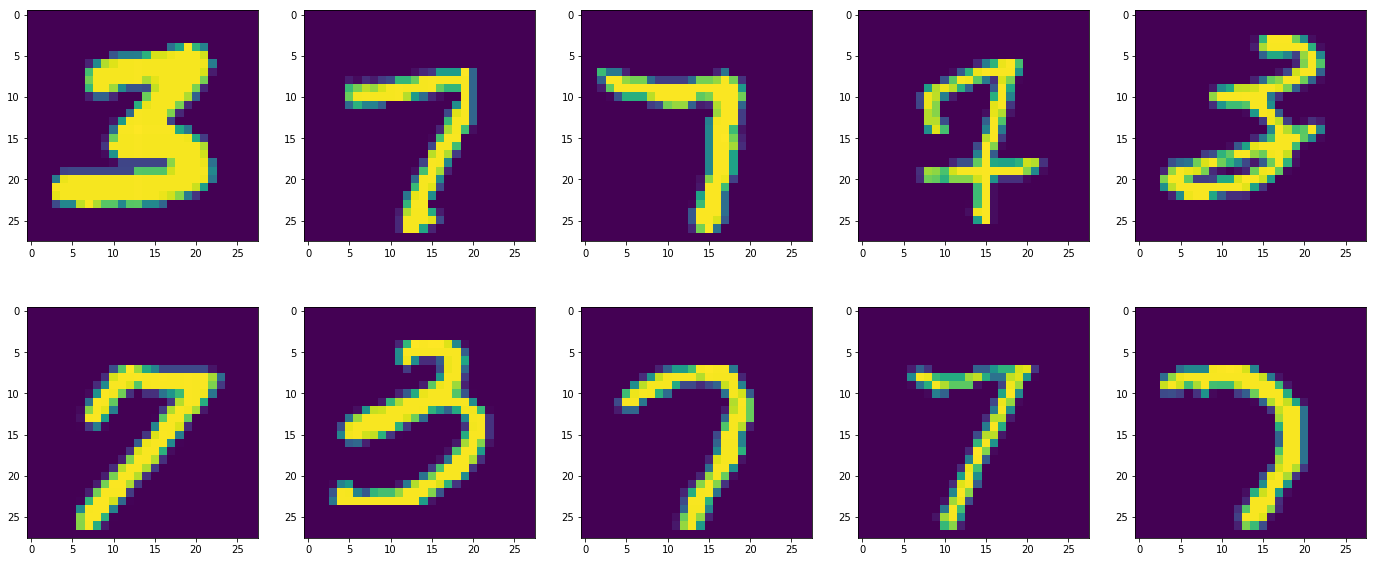

In [44]:
mask1 = np.array(y==3)
mask2 = np.array(y==7)
mask = mask1+mask2  #somme terme à terme
X37 = X[mask]
y37 = y[mask]

plt.figure(figsize=(24,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow((X37[randint(0,len(X37)-1)]).reshape(28,28))

In [45]:
np.shape(X[mask1])

(7141, 784)

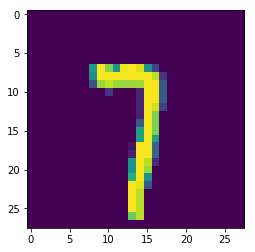

In [46]:
plt.imshow((X37[7141]).reshape(28,28))

In [47]:
from sklearn import linear_model

skl_linmod = linear_model.LogisticRegression(fit_intercept=False)

In [48]:
skl_linmod.fit(X37,y37)

C:\Users\Mathilde\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
interact(fig_digit,  x=fixed(X37[8000]), w=fixed(skl_linmod.coef_.T), alpha=(0.1, 300, 0.1));

interactive(children=(FloatSlider(value=150.0, description='alpha', max=300.0, min=0.1), Output()), _dom_class…

In [50]:
import matplotlib.animation as animation

from matplotlib import rc
from IPython.display import HTML

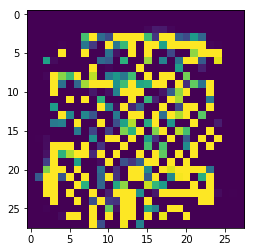

In [51]:
w= skl_linmod.coef_.T
x= X37[8000]

fig = plt.figure()

def fig_anim(x, w, i):
    return((x.reshape(784,1)-i/np.linalg.norm(w)**2 * np.dot(w.T,x) * w).reshape(28,28))
    
im = plt.imshow(fig_anim(x,w,0).reshape(28,28), animated=True)

def animate(alpha):
    xmod = fig_anim(x,w,alpha)
    im.set_array(xmod)
    return im,

anim = animation.FuncAnimation(fig, animate, frames=200, blit=True, interval= 0.1)

anim.save('animation3.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

In [52]:
HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="animation3.mp4" type="video/mp4">
</video>
</div>
""")

Module created for script run in IPython


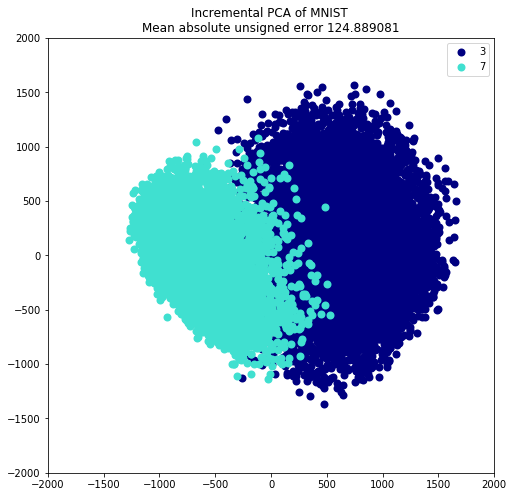

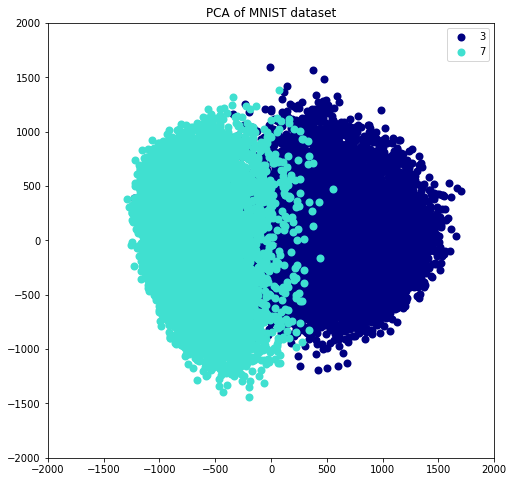

In [53]:
print(__doc__)

from sklearn.decomposition import PCA, IncrementalPCA

n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X37)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X37)

colors = ['navy', 'turquoise']
label = np.array(['3', '7'], dtype='<U10')

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [3, 7], label):
        plt.scatter(X_transformed[y37 == i, 0], X_transformed[y37 == i, 1], color=color, lw=2, label=target_name)

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of MNIST \nMean absolute unsigned error " "%.6f" % err)
    else:
        plt.title(title + " of MNIST dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-2000, 2000, -2000, 2000])

plt.show()